# [Lighthouse] Desafio Ciência de Dados 2025-11



Importação das Bibliotecas

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importação e leitura do banco de dados

In [173]:

# Leitura do arquivo csv
df = pd.read_csv("../Dataset/desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# Análise Exploratória dos Dados

## Atributos

Series_Title – Nome do filme
Released_Year - Ano de lançamento
Certificate - Classificação etária
Runtime – Tempo de duração
Genre - Gênero
IMDB_Rating - Nota do IMDB
Overview - Overview do filme
Meta_score - Média ponderada de todas as críticas 
Director – Diretor
Star1 - Ator/atriz #1
Star2 - Ator/atriz #2
Star3 - Ator/atriz #3
Star4 - Ator/atriz #4
No_of_Votes - Número de votos
Gross - Faturamento


## Informações sobre os atributos do dataset

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## Contagem de linhas duplicadas

In [175]:
df.duplicated().sum() 

np.int64(0)

## Verificação de valores nulos

In [176]:
df.isnull().sum()


Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Números de linhas e colunas totais (Contando com o índice)

In [177]:
df.shape

(999, 16)

# Tratamento de dados

## Exclusão dos valores nulos e outros valores

In [178]:
# Remoção da coluna "Unnamed: 0" Referente ao índice do Dataset
df.drop(columns="Unnamed: 0", inplace=True)

In [179]:
# Exclusão dos valores nulos
df.dropna(inplace=True)

In [180]:
#Número de linhas e colunas restantes após exclusão dos valores nulos
df.shape

(713, 15)

## Ajustes

In [181]:

#Converção de ano de lançamento para numérico
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')

#Removendo 'min' de Runtime e converter para float
df['Runtime'] = df['Runtime'].astype(str).str.replace(" min", "", regex=False).astype(float)

#Remover vírgulas de Gross e converter para numérico
df['Gross'] = df['Gross'].astype(str).str.replace(",", "", regex=False).astype(float).astype('Int64')

In [182]:

# Conferir novamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 996
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   713 non-null    object 
 1   Released_Year  712 non-null    Int64  
 2   Certificate    713 non-null    object 
 3   Runtime        713 non-null    float64
 4   Genre          713 non-null    object 
 5   IMDB_Rating    713 non-null    float64
 6   Overview       713 non-null    object 
 7   Meta_score     713 non-null    float64
 8   Director       713 non-null    object 
 9   Star1          713 non-null    object 
 10  Star2          713 non-null    object 
 11  Star3          713 non-null    object 
 12  Star4          713 non-null    object 
 13  No_of_Votes    713 non-null    int64  
 14  Gross          713 non-null    Int64  
dtypes: Int64(2), float64(3), int64(1), object(9)
memory usage: 90.5+ KB


In [183]:
#Separar o gênero principal(primeiro da lista) quando há multiplos gêneros
df['Main_Genre'] = df['Genre'].str.split(', ').str[0]
df['Main_Genre']


0          Crime
1         Action
2          Crime
3          Crime
4         Action
         ...    
989        Drama
990    Adventure
991    Animation
993       Comedy
996        Drama
Name: Main_Genre, Length: 713, dtype: object

## Visualização do dataset pós-tratamento

In [184]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Main_Genre
0,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,Crime
1,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,Action
2,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,Crime
3,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,Crime
4,The Lord of the Rings: The Return of the King,2003,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Giù la testa,1971,PG,157.0,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690,Drama
990,Kelly's Heroes,1970,GP,144.0,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435,Adventure
991,The Jungle Book,1967,U,78.0,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612,Animation
993,A Hard Day's Night,1964,U,87.0,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024,Comedy


# Descrição estatística das colunas quantitativas

In [185]:
colunas_quantitativas = df.select_dtypes(include=['float64', 'int64']).columns
descricao_estatistica = df[colunas_quantitativas].describe()
descricao_estatistica.to_excel('../Resultados/descricao_estatistica.xlsx', index=True)
descricao_estatistica
#Salvando a descrição estatística do dataset em um arquivo Excel

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,712.0,713.000000,713.000000,713.000000,7.130000e+02,713.0
mean,1995.738764,123.690042,7.935203,77.154278,3.533480e+05,78583952.863955
std,18.611182,25.896632,0.288999,12.409392,3.462212e+05,115043278.676214
min,1930.0,72.000000,7.600000,28.000000,2.522900e+04,1305.0
25%,1986.75,104.000000,7.700000,70.000000,9.582600e+04,6153939.0
50%,2001.0,120.000000,7.900000,78.000000,2.363110e+05,35000000.0
75%,2010.0,136.000000,8.100000,86.000000,5.059180e+05,102515793.0
max,2019.0,238.000000,9.200000,100.000000,2.303232e+06,936662225.0


# Frequência de colunas qualitativas

## Coluna Certificate (Classificação Etária) com percentual de frequência

In [186]:
frequencia_certificate = pd.DataFrame({'Frequency': df['Certificate'].value_counts(), 'Percentage': (df['Certificate'].value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_certificate.to_excel('../Resultados/frequencia_certificate.xlsx', index=True)
frequencia_certificate
#Exibe a frequencia das classificações etárias com porcentagem

,Frequency,Percentage
Certificate,,
U,183,25.67%
A,173,24.26%
UA,142,19.92%
R,131,18.37%
PG-13,38,5.33%
PG,19,2.66%
G,9,1.26%
Passed,9,1.26%
Approved,6,0.84%


## Coluna Genre

In [187]:
frequencia_genre = pd.DataFrame({'Frequency': df['Main_Genre'].value_counts(), 'Percentage': (df['Main_Genre'].value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_genre.to_excel('../Resultados/frequencia_genere_with_percentage.xlsx', index=True)
frequencia_genre
#Exibe a frequencia dos gêneros com porcentagem

,Frequency,Percentage
Main_Genre,,
Drama,191,26.79%
Action,127,17.81%
Comedy,104,14.59%
Crime,74,10.38%
Biography,73,10.24%
Animation,63,8.84%
Adventure,58,8.13%
Horror,9,1.26%
Mystery,7,0.98%


## Coluna Director


In [188]:
frequencia_director = pd.DataFrame({'Frequency': df['Director'].value_counts(), 'Percentage': (df['Director'].value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_director.to_excel('../Resultados/frequencia_director.xlsx', index=True)
frequencia_director.iloc[:15]
#Exibe a frequencia dos 15 diretores com mais filmes no dataset

,Frequency,Percentage
Director,,
Steven Spielberg,13,1.82%
Martin Scorsese,10,1.40%
Alfred Hitchcock,9,1.26%
David Fincher,8,1.12%
Clint Eastwood,8,1.12%
Christopher Nolan,8,1.12%
Quentin Tarantino,8,1.12%
Woody Allen,7,0.98%
Rob Reiner,7,0.98%


## Colunas 'Star1', 'Star2', 'Star3' e 'Star4'

In [189]:
df_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
df_stars

0         Marlon Brando
1        Christian Bale
2             Al Pacino
3           Henry Fonda
4           Elijah Wood
             ...       
989         Maria Monti
990    Carroll O'Connor
991    Bruce Reitherman
993         Ringo Starr
996          Donna Reed
Length: 2852, dtype: object

## Frequência Stars

In [190]:
frequencia_stars = pd.DataFrame({'Frequency': df_stars.value_counts(), 'Percentage': (df_stars.value_counts(normalize=True) * 100) .map('{:.2f}%'.format)})
frequencia_stars.to_excel('../Resultados/frequencia_stars.xlsx', index=True)
frequencia_stars.iloc[:15]
#Exibe a frequencia dos 15 atores/atrizes com mais filmes no dataset

,Frequency,Percentage
Robert De Niro,16,0.56%
Tom Hanks,14,0.49%
Al Pacino,13,0.46%
Brad Pitt,12,0.42%
Leonardo DiCaprio,11,0.39%
Clint Eastwood,11,0.39%
Matt Damon,11,0.39%
Christian Bale,11,0.39%
Denzel Washington,9,0.32%
Scarlett Johansson,9,0.32%


# Plotagem de Dados

## Distribuição das notas(IMDB_Rating)

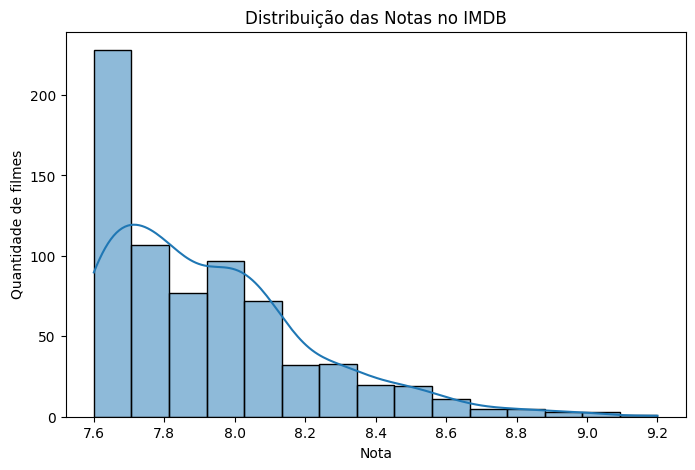

In [191]:
plt.figure(figsize=(8,5))
sns.histplot(df['IMDB_Rating'], bins=15, kde=True)
plt.title("Distribuição das Notas no IMDB")
plt.xlabel("Nota")
plt.ylabel("Quantidade de filmes")
plt.show()


## Classificação Etária (Certificate)

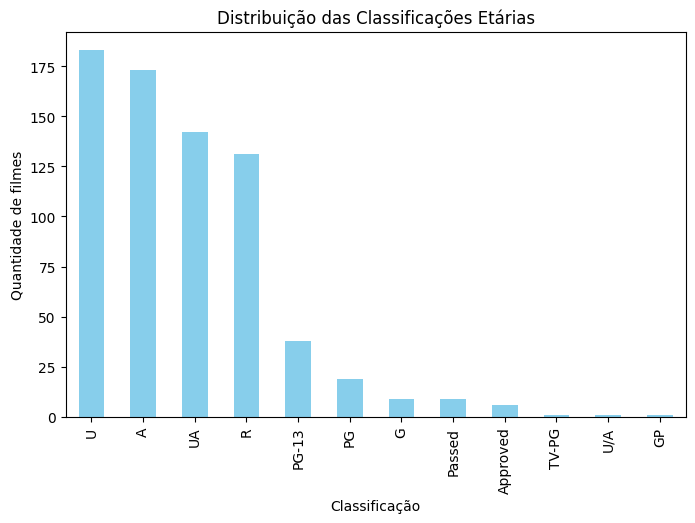

In [192]:
plt.figure(figsize=(8,5))
df['Certificate'].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribuição das Classificações Etárias")
plt.xlabel("Classificação")
plt.ylabel("Quantidade de filmes")
plt.show()
